In [13]:
from data.synthetic_data import generate_icecream_data, generate_gender_age_data
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
from data import real_data
from interpretability import visualizations as vz
from simple_spn import spn_handler
from simple_spn import functions as fn
from util import io
from pprint import pprint

from spn.experiments.AQP.Ranges import NominalRange, NumericRange

In [14]:
from sklearn.datasets import make_classification, make_moons, make_blobs


In [15]:
# data, target = make_classification(n_samples=20, n_features=2,)
data, target = make_blobs(n_samples=40, n_features=2, random_state=6, cluster_std=3)

In [16]:
#transform: 
#age = x, icecream_eaten/year = y 18 muss x~=0 entsprechen
x,y = data[:, 0], data[:, 1]
y = np.round(y - np.min(y))
x = np.round((x - np.min(x) + 1) * 1.3)


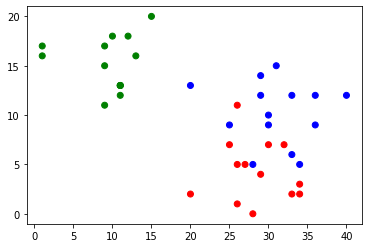

In [17]:
colors = {0: 'blue', 1: 'red', 2: 'green'} #Mann, Frau, Kind
plt.scatter(x, y, color=[colors[t] for t in target], )
plt.yticks([0, 5, 10 , 15, 20])
plt.show()

#nodes:    9
#sums:     1
#products: 2
#leaves:   6
#edges:    8


<Figure size 432x288 with 0 Axes>

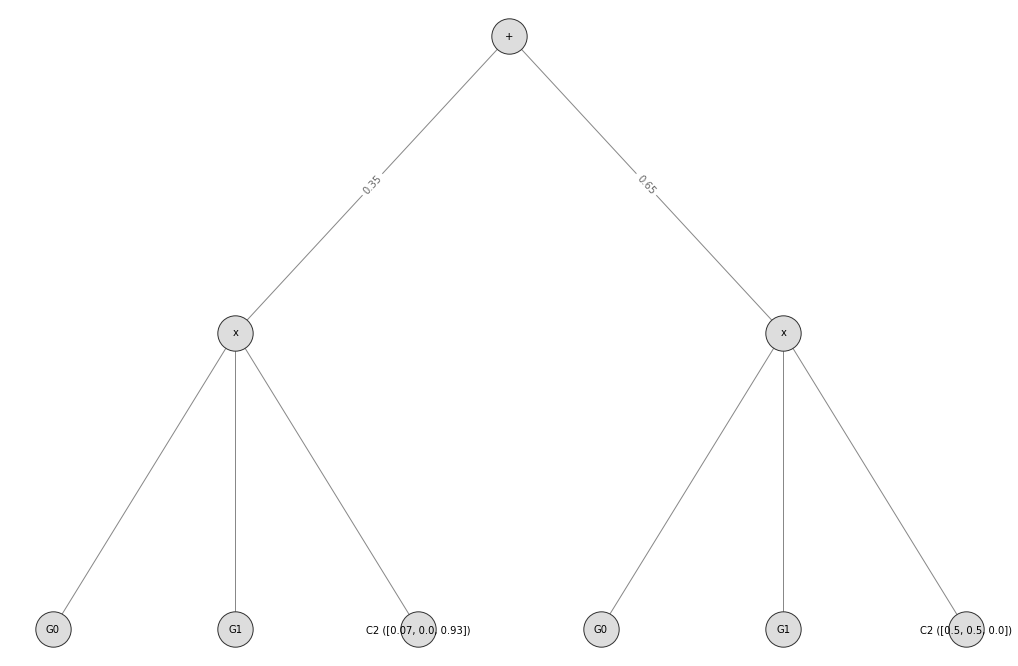

In [20]:
data, info = generate_icecream_data()
dataset_name = 'icecream'
#parameters for the construction
rdc_threshold = 0.3
min_instances_slice = 0.01
if not spn_handler.exist_spn(dataset_name, rdc_threshold, min_instances_slice):
    print("Creating SPN ...")
    
    #get data
    # df, value_dict, parametric_types = real_data.get_titanic()
    
    #Creates the SPN and saves to a file 
    spn_handler.create_parametric_spns(data, info, dataset_name, min_instances_slices=[min_instances_slice])
#Load SPN
spn, value_dict, _ = spn_handler.load_spn(dataset_name, rdc_threshold, min_instances_slice)
#Print some statistics
fn.print_statistics(spn)
fn.plot_spn(spn, "icecream_spn.pdf")

{'id': 0,
 'scope': [0, 1, 2],
 'weights': [0.35, 0.65],
 'children': [ProductNode_1, ProductNode_2]}